In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error

In [4]:
# Load dataset
file_path = "question4-stock-data.csv"
df = pd.read_csv(file_path)

In [6]:
# Convert Date column to datetime
df['Date'] = pd.to_datetime(df['Date'])

In [15]:
# Drop missing values and unnecessary columns
df = df.dropna(subset=['Date'])
df = df.fillna(method='ffill')
df = df.drop(columns=['Unnamed: 0'])

/tmp/ipykernel_463011/1083648050.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')


In [16]:
# Display first few rows
df.head()

,Date,Adj Close,Close,High,Low,Open,Volume
0,1980-03-17,2.296798,3.291227,3.344743,3.291227,0.000000,41109.0
1,1980-03-18,2.306134,3.304606,3.358122,3.304606,0.000000,9343.0
2,1980-03-19,2.306134,3.304606,3.304606,3.304606,3.304606,0.0
3,1980-03-20,2.306134,3.304606,3.358122,3.304606,0.000000,10277.0
4,1980-03-21,2.362154,3.384880,3.438396,3.384880,0.000000,8409.0


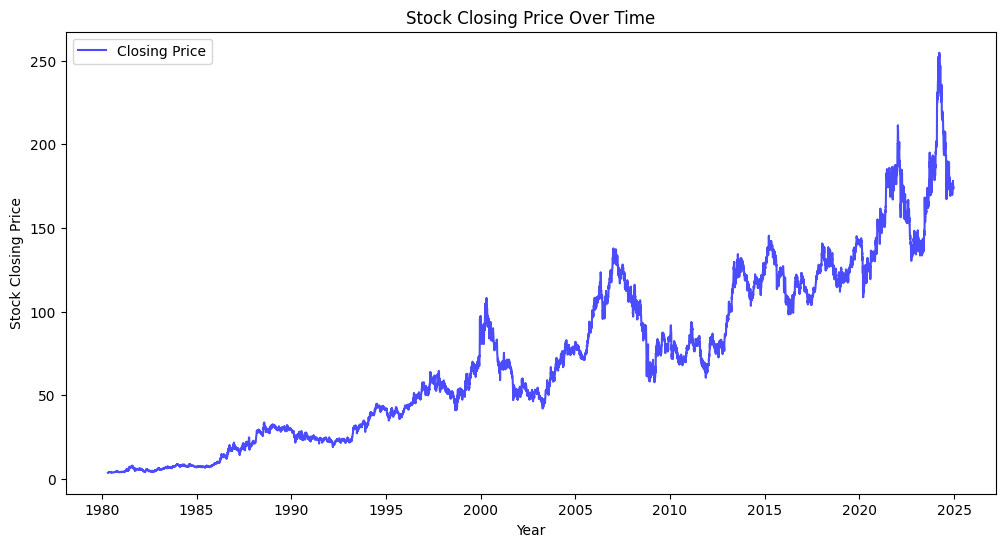

In [49]:
# Plot stock closing price trend
plt.figure(figsize=(12, 6))

plt.plot(df['Date'], df['Close'], label='Closing Price', color='blue', alpha=0.7)
# plt.plot(df['Date'], df['Adj Close'], label='Adj Closing Price', color='red', alpha=0.7)
# plt.plot(df['Date'], df['Open'], label='Adj Closing Price', color='green', alpha=0.7)

plt.xlabel('Year')
plt.ylabel('Stock Closing Price')
plt.title('Stock Closing Price Over Time')

plt.legend()
plt.show()

In [29]:

# Create target variable (Future Close Price)
df['Future_Close'] = df['Close'].shift(-5)

# Moving Averages
df['MA_7'] = df['Close'].rolling(window=7).mean()
df['MA_14'] = df['Close'].rolling(window=14).mean()
df['MA_30'] = df['Close'].rolling(window=30).mean()

# Volatility - Rolling standard deviation over 10 days
df['Volatility_10'] = df['Close'].rolling(window=10).std()

# Momentum - Rate of Change (ROC)
df['Momentum'] = df['Close'].pct_change(periods=5)

# Relative Strength Index (RSI)
def compute_rsi(series, period=14):
    delta = series.diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=period).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=period).mean()
    rs = gain / loss
    return 100 - (100 / (1 + rs))

df['RSI_14'] = compute_rsi(df['Close'])

# Drop NaN values introduced by rolling calculations
df = df.dropna()

# Display processed dataset
df.head()


,Date,Adj Close,Close,High,Low,Open,Volume,Future_Close,MA_7,MA_14,MA_30,Volatility_10,Momentum,RSI_14
29,1980-04-28,2.502202,3.585565,3.639081,3.585565,0.000000,2803.0,3.692597,3.488089,3.451775,3.374623,0.053609,0.046875,86.111114
30,1980-04-29,2.539549,3.639081,3.692597,3.639081,0.000000,74744.0,3.772870,3.518670,3.472799,3.386218,0.072200,0.062500,84.374998
31,1980-04-30,2.548885,3.652460,3.705975,3.652460,0.000000,3737.0,3.772870,3.551162,3.491912,3.397813,0.085783,0.045977,83.333333
32,1980-05-01,2.558223,3.665839,3.719354,3.665839,0.000000,934.0,3.786249,3.585565,3.512936,3.409854,0.095898,0.041825,86.666682
33,1980-05-02,2.558223,3.665839,3.665839,3.665839,3.665839,0.0,3.799628,3.610412,3.533960,3.421895,0.094772,0.033962,86.666682


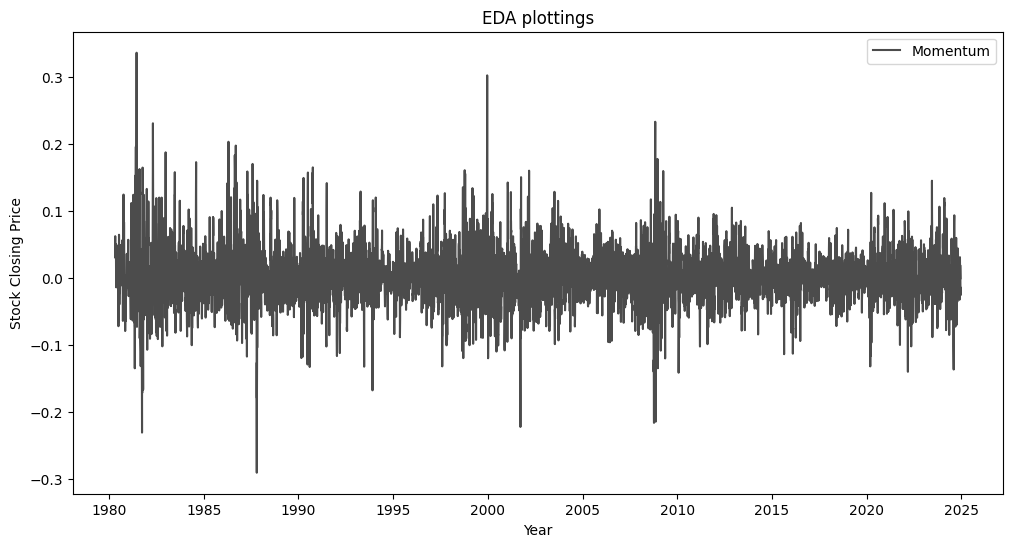

In [53]:
# Plot moving averages
plt.figure(figsize=(12, 6))

# plt.plot(df['Date'], df['MA_7'], label='MA_7', color='blue', alpha=0.7)
# plt.plot(df['Date'], df['MA_14'], label='MA_14', color='red', alpha=0.7)
# plt.plot(df['Date'], df['MA_30'], label='MA_30', color='green', alpha=0.7)
# plt.plot(df['Date'], df['Volatility_10'], label='Volatility_10', color='black', alpha=0.7)
plt.plot(df['Date'], df['Momentum'], label='Momentum', color='black', alpha=0.7)

plt.xlabel('Year')
plt.ylabel('Stock Closing Price')
plt.title('EDA plottings')

plt.legend()
plt.show()

In [30]:
features = ['Close', 'MA_7', 'MA_14', 'MA_30', 'Volatility_10', 'Momentum', 'RSI_14']
target = 'Future_Close'

# Splitting data
X = df[features]
y = df[target]

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split (80-20)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, shuffle=False)


In [36]:

# Train Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
rmse_lr = root_mean_squared_error(y_test, y_pred_lr)

# Train Random Forest Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
rmse_rf = root_mean_squared_error(y_test, y_pred_rf)

# Compare models
print(f"Linear Regression RMSE: {rmse_lr:.2f}")
print(f"Random Forest RMSE: {rmse_rf:.2f}")

Linear Regression RMSE: 5.06
Random Forest RMSE: 28.63


In [37]:

# Create a dataframe with predictions
predictions_df = pd.DataFrame({'Date': df['Date'].iloc[-len(y_test):].values, 'Predicted_Close': y_pred_lr})

# Save predictions to CSV
predictions_df.to_csv("stock_predictions.csv", index=False)

# Display sample predictions
predictions_df.head()

,Date,Predicted_Close
0,2016-01-21,111.554466
1,2016-01-22,115.905450
2,2016-01-25,113.512661
3,2016-01-26,114.309498
4,2016-01-27,115.143417
